<a href="https://colab.research.google.com/github/LeeJeaHyuk/colab-sync-practice/blob/main/%EC%BD%94%EC%9D%B8%EA%B3%BC_%EC%A3%BC%EC%8B%9D%EC%9D%B4_%EB%B0%98%EB%B9%84%EB%A1%80_%ED%95%98%EB%8A%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표 : 코인 거래량과 주식의 거래량은 반비례하는지 알아보기
이재혁 

# **설치**

In [54]:
!pip install pyupbit
# api key 없이 업비트에서 시세를 받는 패키지



     |████████████████████████████████| 103 kB 6.8 MB/s 


In [55]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#matplotlib 한글 쓰기 위해서 설치
#https://teddylee777.github.io/colab/colab-korean 를 참고

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,523 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

# **코드**


In [56]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
#matplotlib 한글 쓰기 위해서

import pyupbit

In [220]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.formatter.limits'] = -10000, 10000

#https://wikidocs.net/113767

In [58]:
pyupbit.get_current_price(["KRW-BTC","KRW-ETH"])
#현재가 비트/이더
ticker = "KRW-BTC"
interval = 'minute1'
to = '2021-11-19 11:20'
count = 10
pyupbit.get_ohlcv(ticker=ticker, interval=interval, to=to, count=count)


,open,high,low,close,volume,value
2021-11-19 20:10:00,70996000.0,71000000.0,70965000.0,70976000.0,3.422203,2.429150e+08
2021-11-19 20:11:00,70985000.0,71001000.0,70947000.0,70974000.0,6.147862,4.364193e+08
2021-11-19 20:12:00,70970000.0,70970000.0,70871000.0,70871000.0,3.350727,2.376170e+08
2021-11-19 20:13:00,70871000.0,70871000.0,70750000.0,70768000.0,3.821744,2.705384e+08
2021-11-19 20:14:00,70768000.0,70768000.0,70693000.0,70695000.0,6.632237,4.691969e+08
2021-11-19 20:15:00,70693000.0,70754000.0,70670000.0,70754000.0,5.209070,3.682981e+08
2021-11-19 20:16:00,70753000.0,70845000.0,70753000.0,70790000.0,3.315635,2.346641e+08
2021-11-19 20:17:00,70778000.0,70790000.0,70754000.0,70758000.0,3.330040,2.357066e+08
2021-11-19 20:18:00,70758000.0,70758000.0,70722000.0,70734000.0,2.185169,1.545987e+08
2021-11-19 20:19:00,70740000.0,70749000.0,70734000.0,70740000.0,3.929992,2.780208e+08


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(

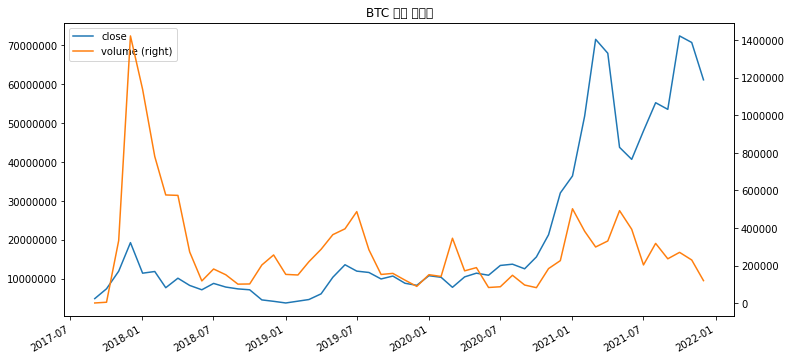

In [59]:
# 시가 : open
# 고가 : high
# 저가 : low
# 종가 : close
# 거래량 : volum
# 거래금액 : value
df = pyupbit.get_ohlcv("KRW-BTC", interval='month',count=200)
df[["close",'volume']].plot(secondary_y=["volume"])
plt.title("BTC 종가 거래량")
plt.show()  

가장 거래량이 높은 순서대로 나열하기
1. 각 월의 거래량 높은 5종을 뽑을 수 있는가?

In [60]:
tickers = pyupbit.get_tickers(fiat='KRW') #원화만 불러오기
ohlcv_tem=pyupbit.get_ohlcv(tickers[0], interval='month',count=36) # 현재부터 3년 전까지 매 달
ohlcv_tem=ohlcv_tem.drop(ohlcv_tem.columns[[0,1,2,3,5]],axis=1) # volume(거래량) 만남기고 다 제거

In [223]:
tickers = pyupbit.get_tickers(fiat='KRW')
ohlcv_tem_1=pyupbit.get_ohlcv(tickers[0], interval='month',count=12)

ohlcv_tem_1.head()

,open,high,low,close,volume,value
2021-01-01 09:00:00,32037000.00000,48550000.00000,31662000.00000,36408000.00000,502401.95083,19486632348247.70312
2021-02-01 09:00:00,36408000.00000,65985000.00000,35907000.00000,51798000.00000,382508.39155,19746448449659.04688
2021-03-01 09:00:00,51798000.00000,72000000.00000,51560000.00000,71513000.00000,298657.88947,19093071779649.89844
2021-04-01 09:00:00,71480000.00000,81994000.00000,54964000.00000,67939000.00000,330778.82570,23452727467091.23047
2021-05-01 09:00:00,67956000.00000,73129000.00000,39331000.00000,43761000.00000,492361.91541,27679914276946.32422


In [61]:
tickers = pyupbit.get_tickers(fiat='KRW')
for i in range(len(tickers)):
    ohlcv_tem=pyupbit.get_ohlcv(tickers[i], interval='month',count=36)
    ohlcv_tem=ohlcv_tem.drop(ohlcv_tem.columns[[0,1,2,3,5]],axis=1)
    ohlcv_tem.rename(columns={'volume': tickers[i]},inplace=True)
    if i==0:
      ohlcv=ohlcv_tem
    else:
      ohlcv=pd.concat([ohlcv,ohlcv_tem],axis=1)#데이터를 오른쪽으로 쭉 합치기

print(ohlcv)

                           KRW-BTC       KRW-ETH  ...     KRW-1INCH      KRW-ALGO
2019-01-01 09:00:00  152628.164880  6.321393e+06  ...           NaN           NaN
2019-02-01 09:00:00  149447.013308  3.818775e+06  ...           NaN           NaN
2019-03-01 09:00:00  220183.662574  2.570495e+06  ...           NaN           NaN
2019-04-01 09:00:00  286261.848102  4.130596e+06  ...           NaN           NaN
2019-05-01 09:00:00  364387.763272  7.741474e+06  ...           NaN           NaN
2019-06-01 09:00:00  395517.385698  3.927051e+06  ...           NaN           NaN
2019-07-01 09:00:00  487170.940628  3.658565e+06  ...           NaN           NaN
2019-08-01 09:00:00  283765.531371  1.958313e+06  ...           NaN           NaN
2019-09-01 09:00:00  152291.291616  1.973330e+06  ...           NaN           NaN
2019-10-01 09:00:00  158003.545596  1.950582e+06  ...           NaN           NaN
2019-11-01 09:00:00  121988.838638  1.758410e+06  ...           NaN           NaN
2019-12-01 09:00

5개를 뽑아서 비교하는 것보다 전부 다 합친 값이 더 잘 반영
거래량을 합친 값을 만들어보기로 함

In [62]:
pd.options.display.float_format = '{:.5f}'.format#지수표현식 바꾸기
volum_sum=ohlcv.sum(axis=1)
print(volum_sum)

2019-01-01 09:00:00      171636110161.09192
2019-02-01 09:00:00     1608159458195.49780
2019-03-01 09:00:00      367809518871.39844
2019-04-01 09:00:00      189408258168.30518
2019-05-01 09:00:00      819190937627.96289
2019-06-01 09:00:00      523884697931.18469
2019-07-01 09:00:00      316264213980.80298
2019-08-01 09:00:00      118272854988.99100
2019-09-01 09:00:00      139617653094.39481
2019-10-01 09:00:00      178639119188.55853
2019-11-01 09:00:00      170928567183.96896
2019-12-01 09:00:00       74925497791.19089
2020-01-01 09:00:00      174319412847.65887
2020-02-01 09:00:00      612118850942.74536
2020-03-01 09:00:00      357317308314.14221
2020-04-01 09:00:00      146903180956.75558
2020-05-01 09:00:00      337234344649.99036
2020-06-01 09:00:00      268571973599.16675
2020-07-01 09:00:00      372789165181.36060
2020-08-01 09:00:00      333898652673.73694
2020-09-01 09:00:00      211626408566.86365
2020-10-01 09:00:00      611118288447.51636
2020-11-01 09:00:00     66723821

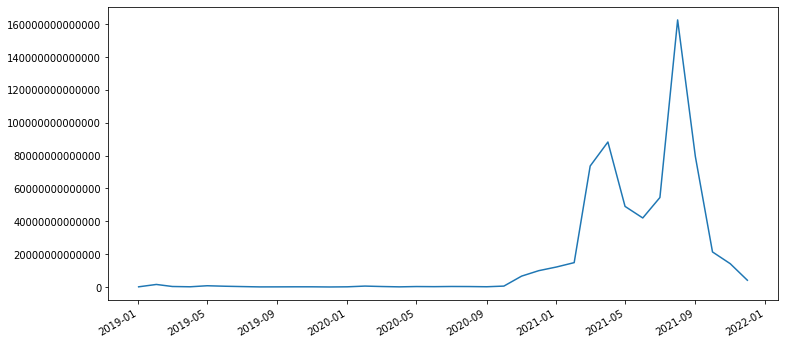

In [63]:
volum_sum.plot()

코인은 2021년부터가 거래량이 많아지기 시작하였으므로 기간을 2021년부터로 조정할 필요를 느꼈다

2021-01-01 09:00:00    12221606236540.51953
2021-02-01 09:00:00    14880307683423.13672
2021-03-01 09:00:00    73643973715926.53125
2021-04-01 09:00:00    88241827475081.25000
2021-05-01 09:00:00    49086458156727.18750
2021-06-01 09:00:00    42047851941449.40625
2021-07-01 09:00:00    54486228309534.69531
2021-08-01 09:00:00   162507944172806.09375
2021-09-01 09:00:00    79461539372368.09375
2021-10-01 09:00:00    21387530542506.98047
2021-11-01 09:00:00    14241664403830.75977
2021-12-01 09:00:00     4175782127691.94775
Freq: MS, dtype: float64


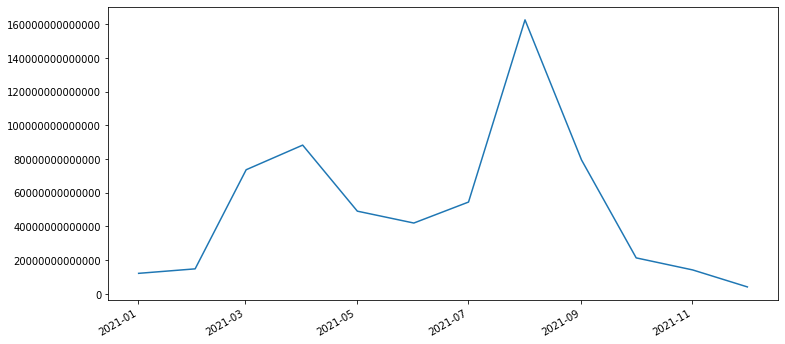

In [173]:
tickers = pyupbit.get_tickers(fiat='KRW')
for i in range(len(tickers)):
    ohlcv_tem=pyupbit.get_ohlcv(tickers[i], interval='month',count=12)
    ohlcv_tem=ohlcv_tem.drop(ohlcv_tem.columns[[0,1,2,3,5]],axis=1)
    ohlcv_tem.rename(columns={'volume': tickers[i]},inplace=True)
    if i==0:
      ohlcv=ohlcv_tem
    else:
      ohlcv=pd.concat([ohlcv,ohlcv_tem],axis=1)#데이터를 오른쪽으로 쭉 합치기

pd.options.display.float_format = '{:.5f}'.format#지수표현식 바꾸기
volum_sum=ohlcv.sum(axis=1)
volum_sum.plot()

이제 주식 과거 데이터를 가져와서 비교해보기로 하였다


In [65]:
!pip install yfinance
import yfinance as yf

In [66]:
!pip install -U finance-datareader #한국 주식 종목코드 가져오기 위해서


BeautifulSoup로 종목코드50개를 추출하려고 하였지만 크롤링 할 시 한글깨짐현상 발생

In [67]:
#종목코드 가져오기
import requests
from bs4 import BeautifulSoup as bs
req=requests.get("https://vip.mk.co.kr/newSt/rate/best.php?gubn=kospi")
html = req.text
soup=bs(html,'lxml')
stockcounts=soup.select("#body > div:nth-of-type(12) > div > table > tbody > tr > td:nth-of-type(1) > table.table_4 > tbody > tr")
#body > div:nth-child(12) > div > table > tbody > tr > td:nth-child(1) > table.table_4 > tbody > tr:nth-child(1)
print(html)

<!-- header ºÎºÐ JS¿¡¼­ PHP º¯°æ - by ysm - 13.03.20
<meta http-equiv='Content-Type' content='text/html; charset=euc-kr'>
<script type="text/javascript" src="//vip.mk.co.kr/newSt/include/header_v2.php"></script>
-->
<html lang='ko'>
<head>
    <!-- Google Tag Manager -->
    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-KTPV2SK');</script>
    <!-- End Google Tag Manager -->

<title>¿À´ÃÀÇ Áõ±Ç½Ã¼¼ - ¸ÅÀÏ°æÁ¦ Áõ±Ç¼¾ÅÍ</title>
<meta name="google-site-verification" content="nkDfjHqBsY1V7YxrQorGXQI_DoFid19LCSDHTF6QXnw" />
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<m

코인 방식과 그대로 거래량을 제외한 모든 값 제외

In [78]:
ksp_sym_name=df_kospi[["Symbol","Name"]]
print(ksp_sym_name.iloc[0,1])

AJ네트웍스


4700개라 그런지 실행 도중에 오류가 나서 그냥 50개 종목코드를 가져오기로 했다.


In [128]:
df_code=pd.DataFrame({'code':['005930','005935','001440','004980','009540','034020','005380',
   '090350','000660','033530','010140','005070','028260','018470',
   '000220','066570','000720','006390','019170','015760','003670',
   '007460','007660','006360','011200','005010','004985','025560',
   '034220','020150','003060','009150','042670','009415','088980',
   '036460','042660','088350','093370','097955','017550','028050',
   '019175','000020','035420','012330','034830','008970','004250','038380']})

In [145]:
print(str(df_code.iloc[1,0]))

005935


	삼성전자,삼성전자우,대한전선,성신양회,한국조선해양,두산중공업,현대차,노루페인트,SK하이닉스,세종공업,삼성중공업,
		코스모신소재,삼성물산,조일알미늄,유유제약,LG전자,현대건설,한일현대시멘트,신풍제약,한국전력,포스코케미칼,에이프로젠_MED,
이수페타시스,GS건설,HMM,휴스틸,성신양회우,미래산업,LG디스플레이,일진머티리얼즈,에이프로젠제약,삼성전기,현대두산인프라코어,
태영건설우,맥쿼리인프라,한국가스공사,대우조선해양,한화생명,후성,CJ제일제당_우,수산중공업,삼성엔지니어링,신풍제약우,동화약품,
NAVER,현대모비스,한국토지신탁,동양철관,NPC,LX홀딩스1우

In [147]:
fdr.DataReader(df_code.iloc[0,0],'2021')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.02469
2021-01-05,81600,83900,81600,83900,35335669,0.01084
2021-01-06,83300,84500,82100,82200,42089013,-0.02026
2021-01-07,82800,84200,82700,82900,32644642,0.00852
2021-01-08,83300,90000,83000,88800,59013307,0.07117
...,...,...,...,...,...,...
2021-12-06,75100,76700,74900,76300,16391250,0.00926
2021-12-07,76100,77700,75600,77400,19232453,0.01442
2021-12-08,78300,78600,77100,77400,21558340,0.00000


In [224]:
for i in range(len(df_code)-1): 
    vol_tem = fdr.DataReader(df_code.iloc[i,0],'2021')
    vol_tem=vol_tem.drop(vol_tem.columns[[0,1,2,3,5]],axis=1)
    if i==0:
      vol=vol_tem
    else:
      vol=pd.concat([vol,vol_tem],axis=1)
      
print(vol)

              Volume   Volume    Volume  ...    Volume   Volume   Volume
Date                                     ...                            
2021-01-04  38655276  5455139   7805607  ...   1574398  1930670   104474
2021-01-05  35335669  3870698   5897359  ...   2896714  8308044   111743
2021-01-06  42089013  4103763  29401257  ...   1609673  3130039   123758
2021-01-07  32644642  3858695  10472786  ...   1868086  2068682   148432
2021-01-08  59013307  8225064   9385884  ...   1984318  2146102   102686
...              ...      ...       ...  ...       ...      ...      ...
2021-12-06  16391250  1724092   4104603  ...   1620653   468064   526904
2021-12-07  19232453  1979792   5399236  ...  15805120   539118  1009748
2021-12-08  21558340  1520011   9438780  ...   4563830   652278   426559
2021-12-09  21604528  1415020   7080561  ...   4827551   390477   408933
2021-12-10   9091202   759138   3087459  ...   1986591   532043   595946

[234 rows x 49 columns]


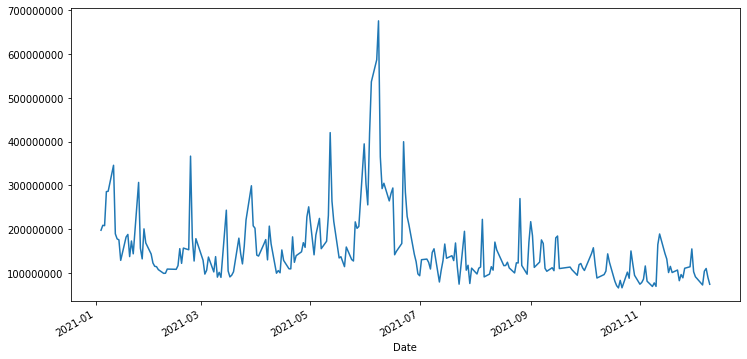

In [225]:
vol_sum=vol.sum(axis=1)
vol_sum.plot()

<BarContainer object of 234 artists>

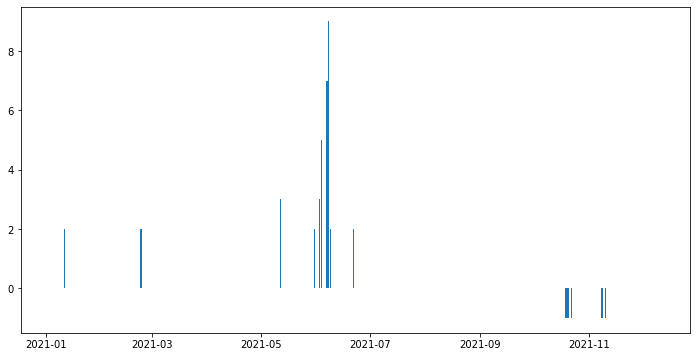

In [218]:
plt.bar((vol_sum.index),vol_sum)

<BarContainer object of 12 artists>

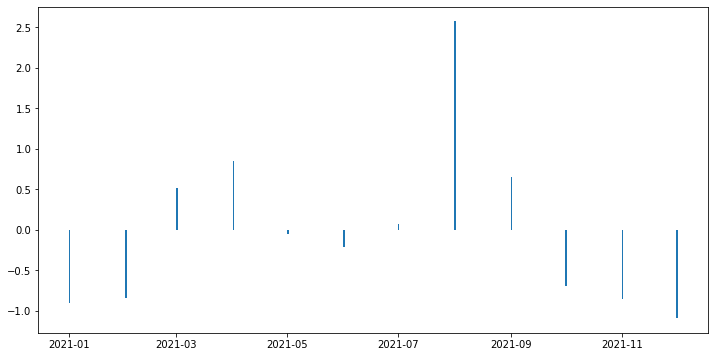

In [219]:
plt.bar((volum_sum.index),volum_sum)

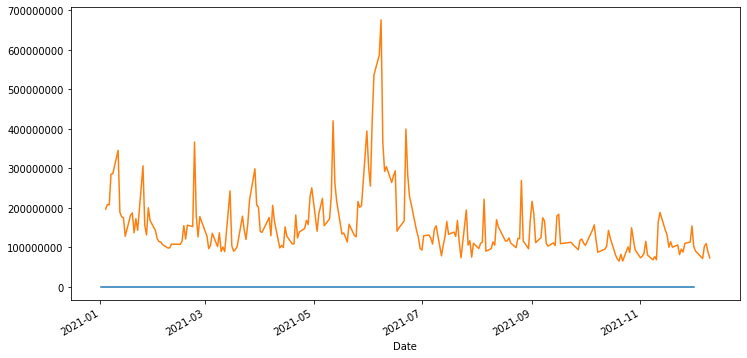

In [226]:
volum_sum.plot()
vol_sum.plot()

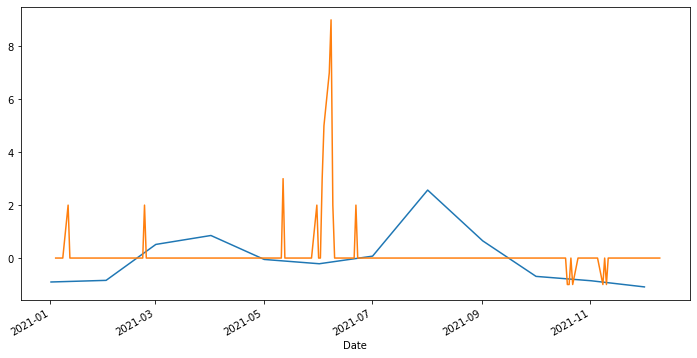

In [216]:
import scipy.stats as ss

tem_volum_sum = ss.zscore(volum_sum)
for i in range(len(volum_sum)):
    volum_sum[i]=tem_volum_sum[i]


tem_vol_sum = ss.zscore(vol_sum)
for i in range(len(vol_sum)):
    vol_sum[i]=tem_vol_sum[i]

volum_sum.plot()
vol_sum.plot()